## Linear Regression model with gradient descent in python from scratch

__Here in this notebook inorder to just to understand the working of gradient descent in python from scratch we took a simple house price prediction dataset and only took one input feature(# of bedrooms) for simplicity and defined a gradient descent function and compared the results with sklearn Linear regression model__

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
cols=['bedrooms','price']
df=pd.read_csv("C://Users//sangeeth kumar//PycharmProjects//python_class2//Sangeeth_Sessions//kc_house_data.csv",usecols=cols)
df.head()

,price,bedrooms
0,221900.0,3
1,538000.0,3
2,180000.0,2
3,604000.0,4
4,510000.0,3


In [7]:
x=df['bedrooms']
y=df['price']

In [15]:
# standardizing the input values
def standardize(x):
    return (x-np.mean(x))/np.std(x)

In [17]:
X=standardize(x)
X=np.c_[np.ones(x.shape[0]),X]
print(X)

[[ 1.         -0.39873715]
 [ 1.         -0.39873715]
 [ 1.         -1.47395936]
 ...
 [ 1.         -1.47395936]
 [ 1.         -0.39873715]
 [ 1.         -1.47395936]]


In [24]:
alpha=0.01
m=y.size
np.random.seed(23)
theta=np.random.rand(2)
iterations=2000

def gradient_descent(x,y,theta,alpha,iterations):
    past_costs=[]
    past_thetas=[theta]
    print(past_thetas)
    for i in range(iterations):
        prediction=np.dot(x,theta) #line equation (theta*x)
        error=prediction-y # error value
        cost=1/(m)*np.dot(error.T,error) #cost function
        past_costs.append(cost)
        theta=theta-(alpha*(1/m)*np.dot(x.T,error)) #updating theta values
        past_thetas.append(theta)
    return past_costs,past_thetas
past_costs,past_thetas=gradient_descent(X,y,theta,alpha,iterations)


[array([0.51729788, 0.9469626 ])]


In [28]:
print(past_thetas[-1])

[540088.14075994 113200.90438675]


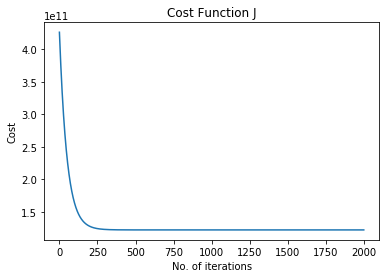

In [11]:
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

__Comparing our results with sklearn Linear regression model__

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=23)
lm=LinearRegression().fit(x_train,y_train)
predictions=lm.predict(x_test)
print(predictions)

[373236.06151341 981708.55149681 494930.55951009 ... 494930.55951009
 494930.55951009 494930.55951009]


In [14]:
print("Linear Regression model Intercept:",lm.intercept_)
print("Linear Regression model Theta1",lm.coef_[1])

Linear Regression model Intercept: 540059.9446691773
Linear Regression model Theta1 113180.78920668224


__As we can see the results of our gradient descent function are Intercept: 540088.14075994,Theta1: 113200.90438675__
__are much closer to the results of sklearn Linear regression model i.e. Intercept: 540059.9446691773,Theta1: 113180.78920668224__

### Thankyou for your interest,please update the notebook if u find any improvements required.